 # Loan Approval Project

## Objective
Embark on an insightful journey into loan data analysis and prediction, designed to provide valuable learnings and practical experience in data science.



## 1. Introduction
- **Dataset Overview**: Let's start by getting familiar with our dataset – understanding its origin, contents, and significance.

### Features Explanation:

1. **credit.policy**: This binary feature reflects whether the borrower meets LendingClub.com's credit underwriting criteria (1) or not (0). This indicator is crucial as it signifies the outcome of the initial creditworthiness assessment based on the lender's policy.

2. **purpose**: A categorical variable that represents the loan's purpose, including categories like 'credit_card', 'debt_consolidation', 'educational', 'major_purchase', 'small_business', and 'all_other'. The purpose of the loan is vital as it influences the loan's risk profile and the likelihood of repayment.

3. **int.rate**: The loan's interest rate represented as a proportion (e.g., 0.11 for 11%). Interest rates are pivotal as they reflect the lender's risk assessment—higher rates often correlate with perceived higher borrower risk.

4. **installment**: The monthly installment amount the borrower must pay if the loan is funded. Installments are significant as their size can impact the borrower's repayment capacity, especially relative to their income and other debts.

5. **log.annual.inc**: The natural logarithm of the borrower's self-reported annual income. Employing the logarithm reduces income distribution skewness, facilitating better modeling.

6. **dti**: The debt-to-income ratio, computed as debt divided by annual income. A higher DTI suggests that a large income portion is allocated to debt servicing, potentially affecting loan repayment.

7. **fico**: The FICO credit score, a critical measure of creditworthiness influencing loan approval and terms.

8. **days.with.cr.line**: The number of days the borrower has had a credit line, where longer histories might imply more financial reliability.

9. **revol.bal**: The borrower's unpaid balance at the credit cycle end, with higher balances possibly indicating financial strain.

10. **revol.util**: The rate at which the borrower utilizes their revolving credit line. Higher rates can signify elevated credit risk.

11. **inq.last.6mths**: The count of credit inquiries in the last six months, where more inquiries can suggest increased credit-seeking behavior and potential risk.

12. **delinq.2yrs**: Instances of being 30+ days late on payments in the past two years, reflecting on the borrower's reliability.

13. **pub.rec**: The count of derogatory public records like bankruptcy filings or tax liens, which can significantly impact creditworthiness.

14. **not.fully.paid**: The binary target variable indicating whether the loan was not fully repaid (1) or was (0). Our predictive modeling efforts focus on this outcome.



# 2. Data Exploration and Cleanup

## Loading the Data
Load and preview the dataset to set the stage for further analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as pl
warnings.filterwarnings('ignore', category=FutureWarning)


file_path = 'loan_data.csv'
loan_data = pd.read_csv(file_path)
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Statistical Summary
Examine the dataset's summary statistics to gain insights into the distribution and scale of each feature.

In [2]:
numerical_summary = loan_data.describe().transpose()

palette = sns.color_palette("viridis", as_cmap=True)

numerical_summary.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.000000,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000
int.rate,9578.000000,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,0.216400
installment,9578.000000,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,940.140000
log.annual.inc,9578.000000,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,14.528354
dti,9578.000000,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,29.960000
fico,9578.000000,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,827.000000
days.with.cr.line,9578.000000,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,17639.958330
revol.bal,9578.000000,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1207359.000000
revol.util,9578.000000,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,119.000000
inq.last.6mths,9578.000000,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,33.000000


## Dealing with Missing Data
Identify and address any missing values in the dataset to maintain the integrity of our analysis.


In [3]:
# Check for missing values in each column
missing_data = loan_data.isnull().sum()

# Display columns with missing values (if any)
missing_data = missing_data[missing_data > 0]
missing_data


Series([], dtype: int64)

## Ensuring Data Quality
Verify that each feature's data type is appropriate for the analysis, adjusting as necessary.


In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


# 3. Exploratory Data Analysis (EDA)
## Individual Feature Review
Analyze the distribution and basic statistics of each feature to understand its characteristics and significance.


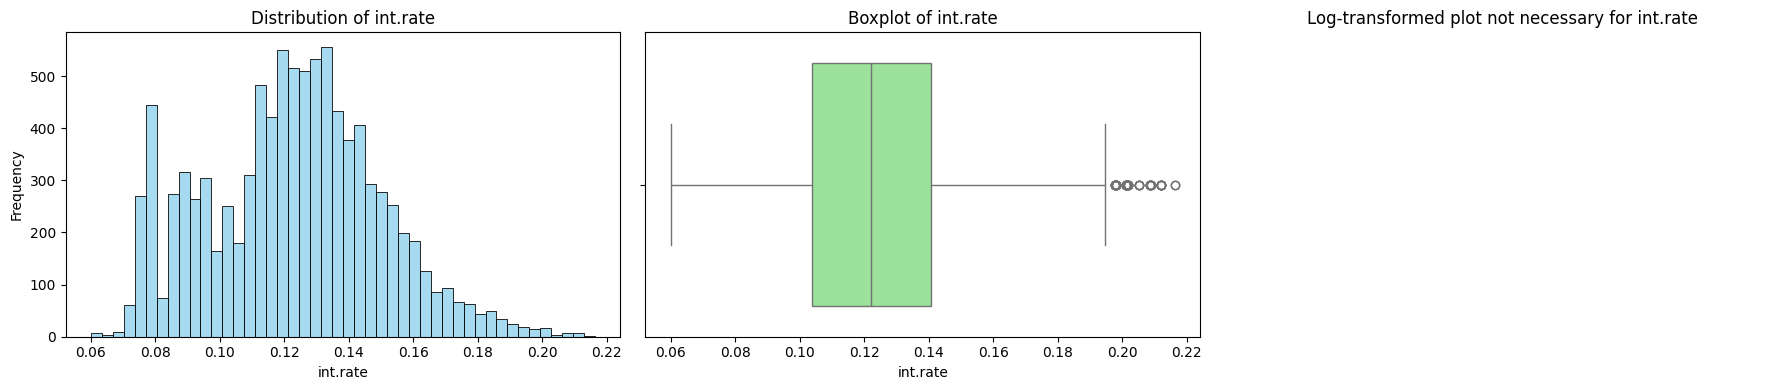

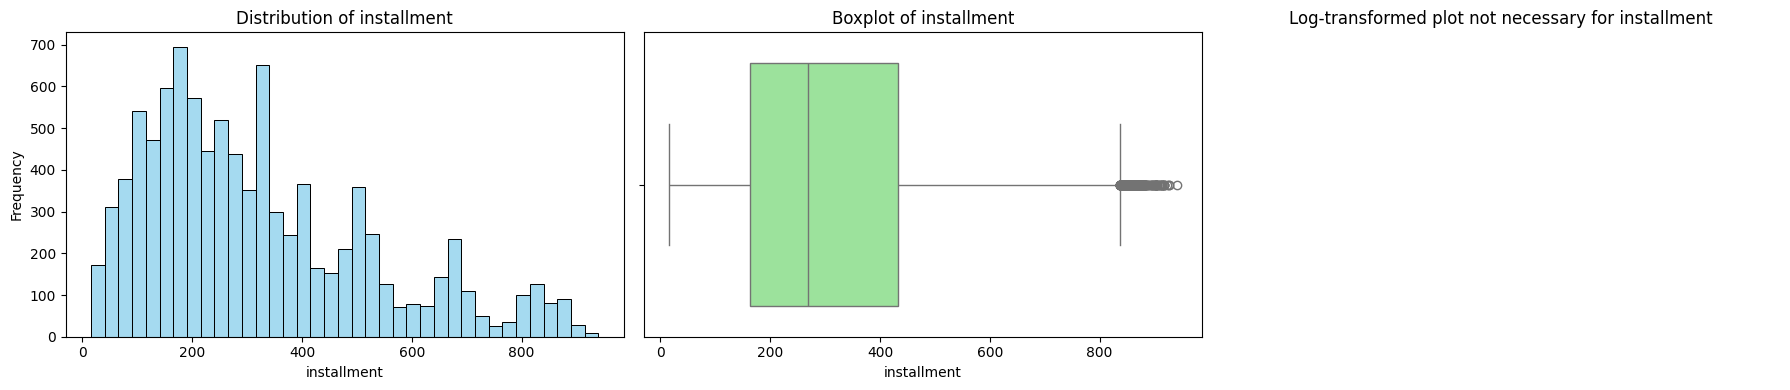

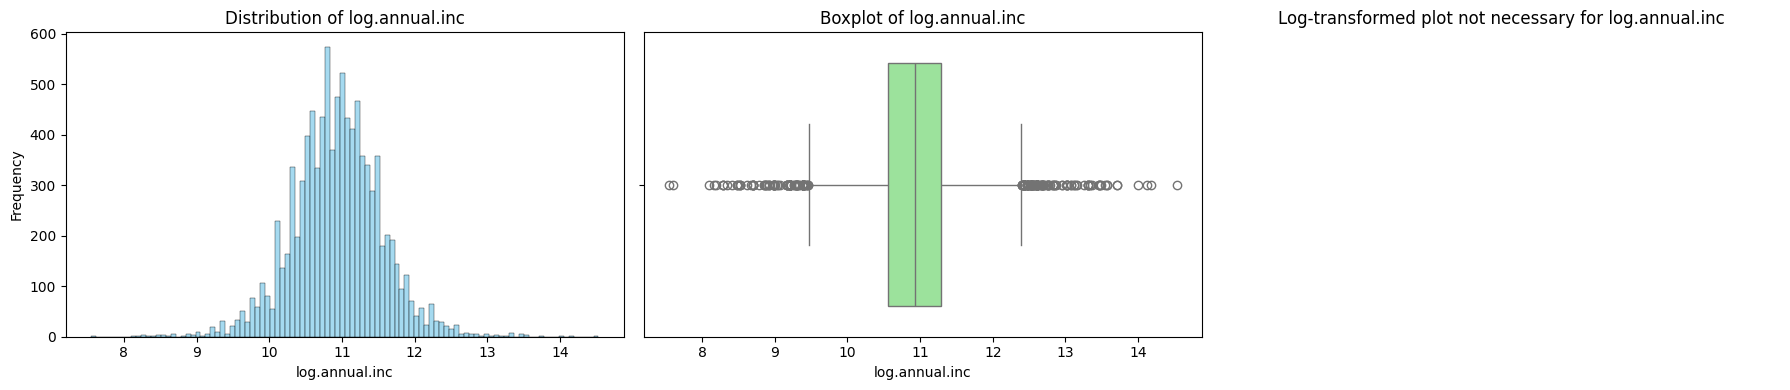

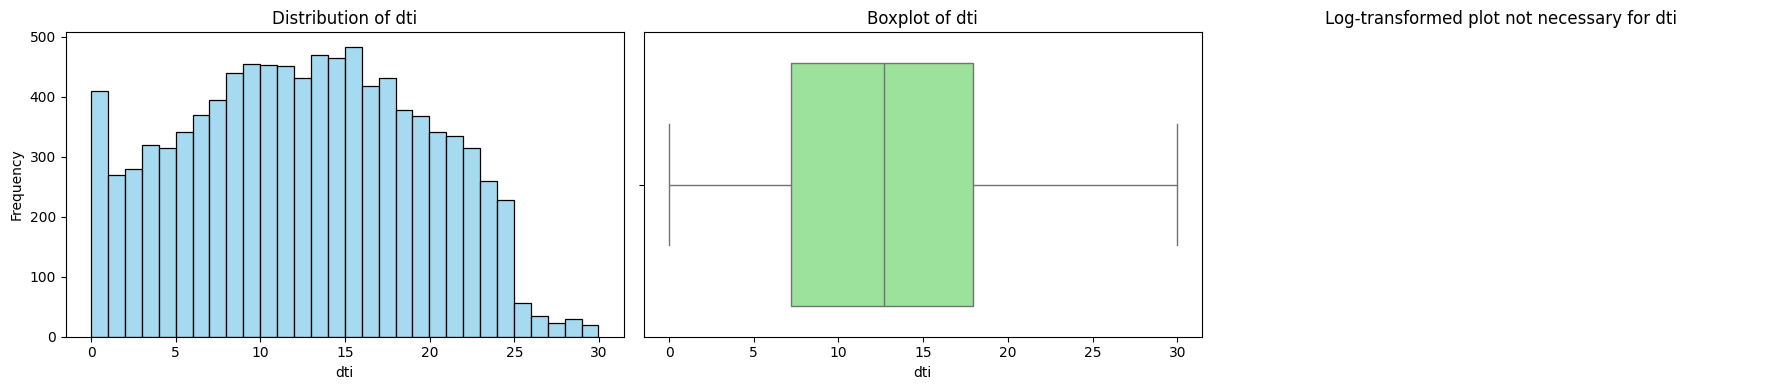

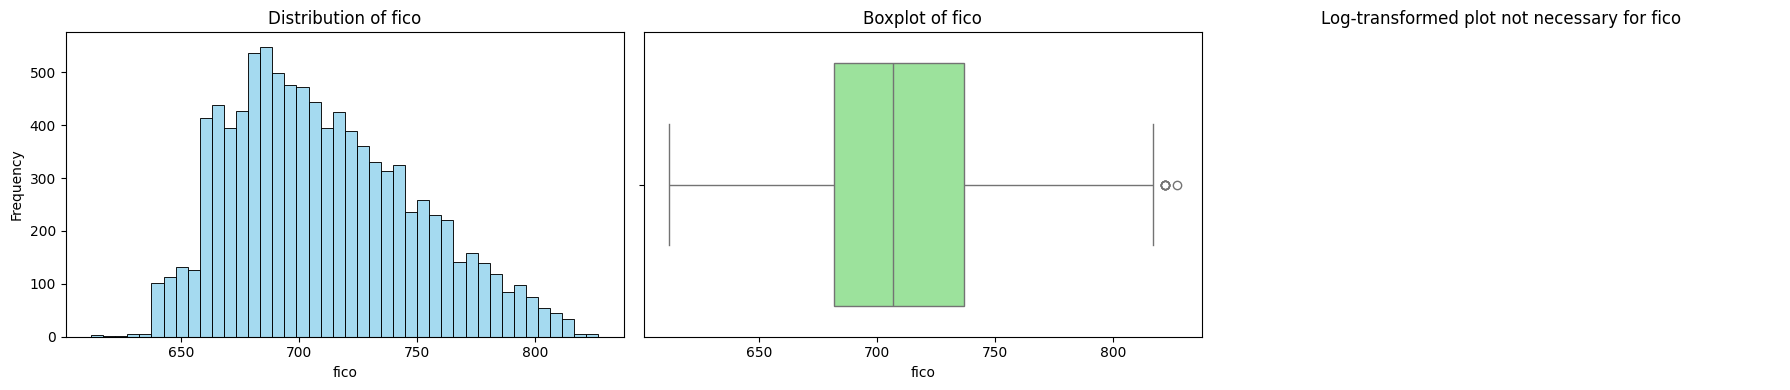

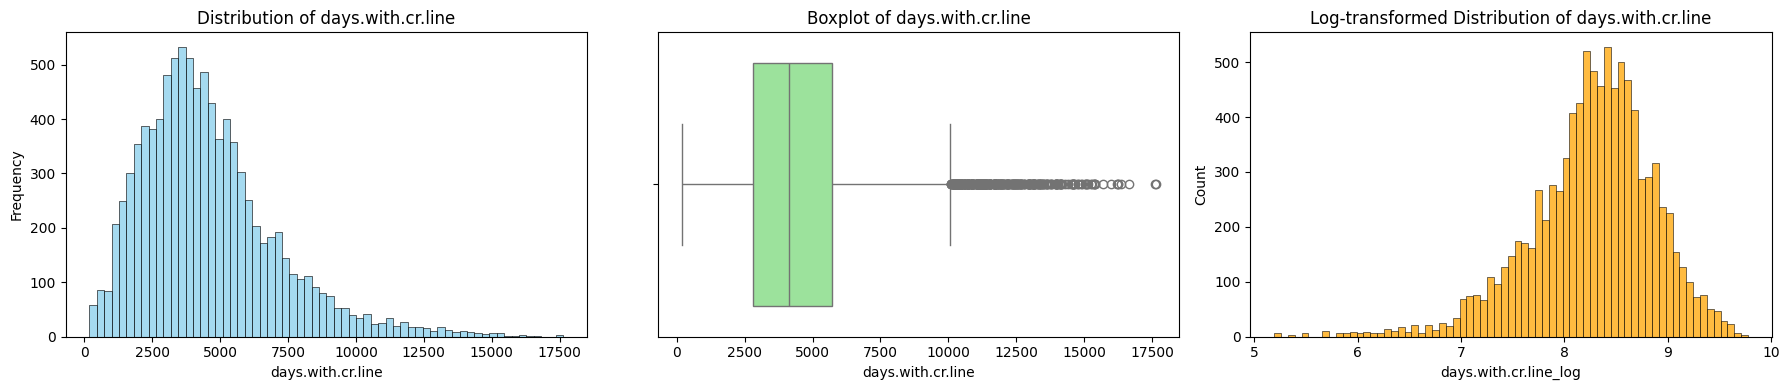

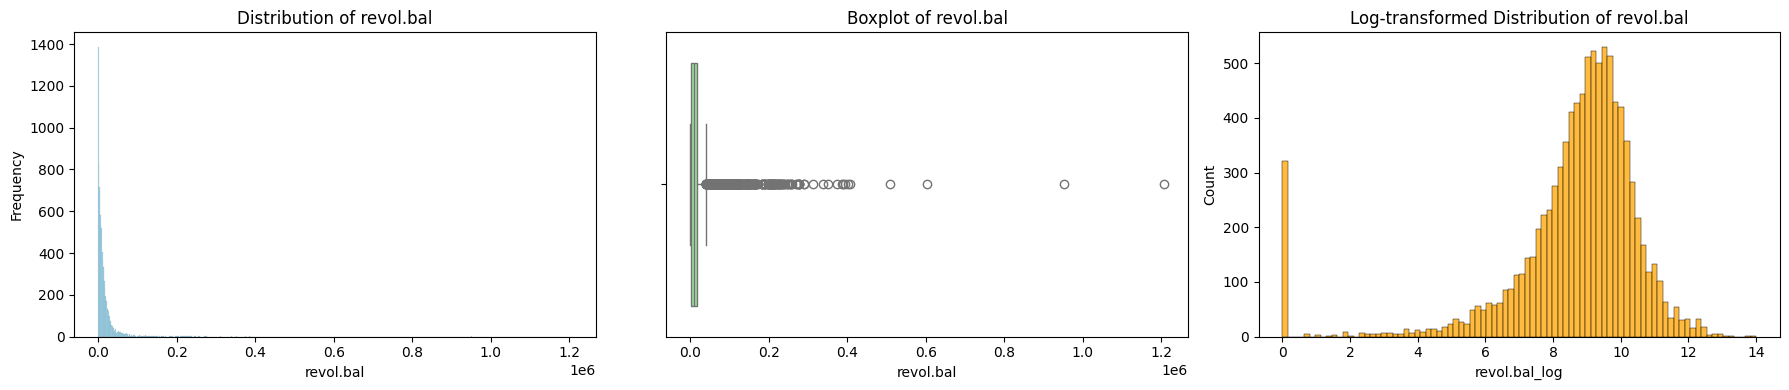

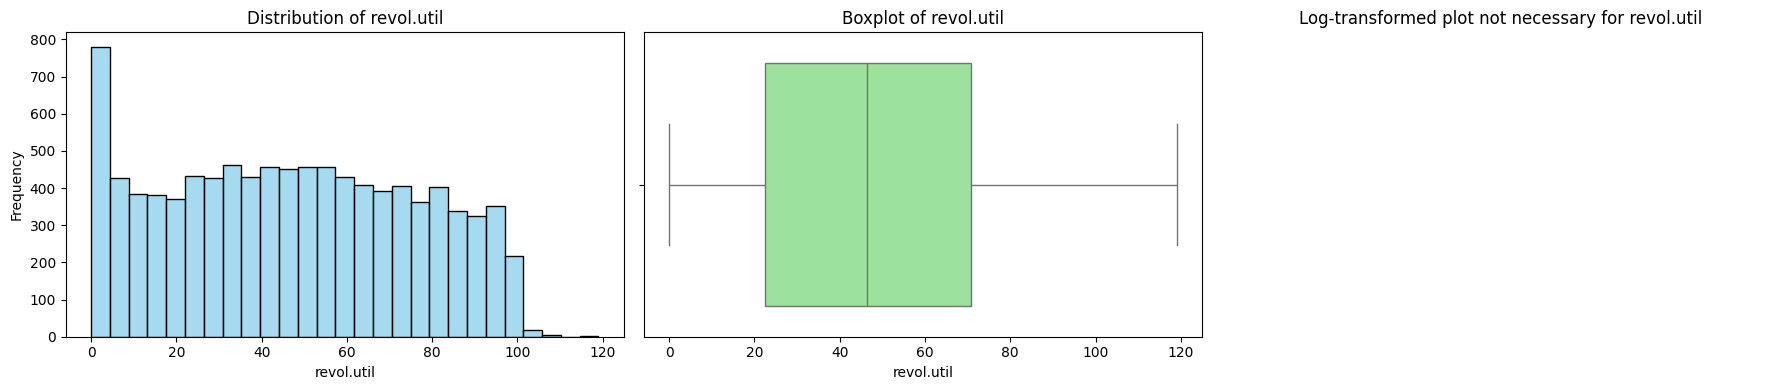

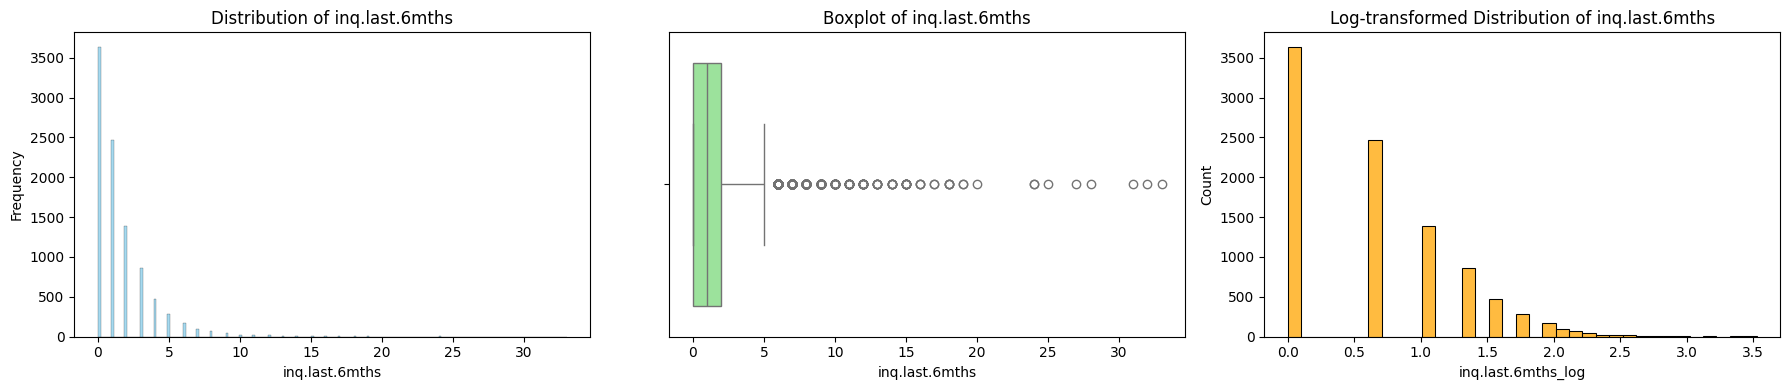

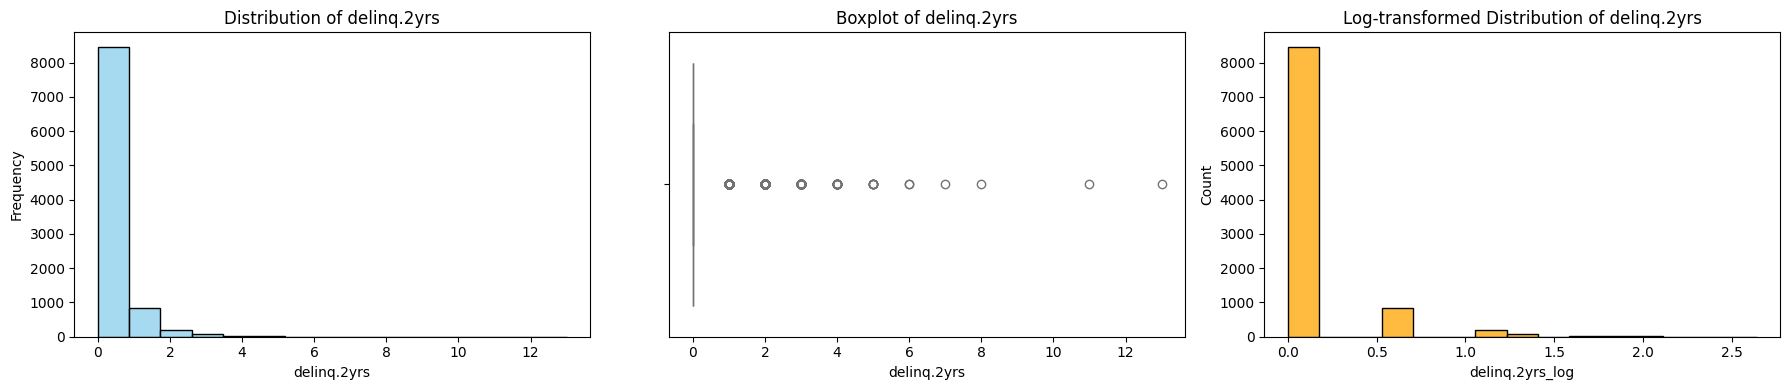

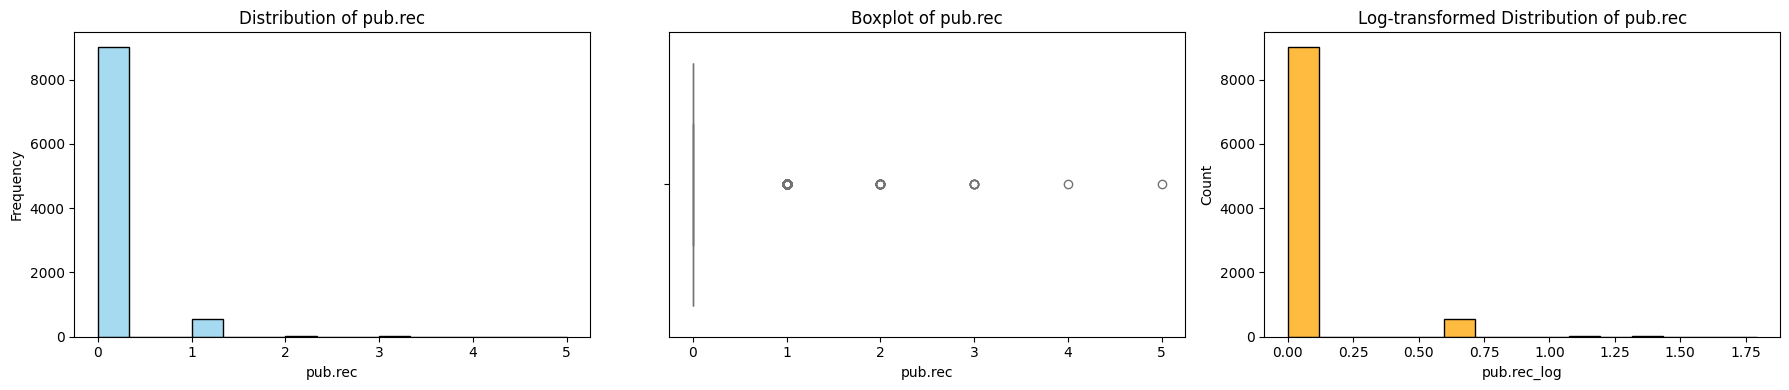

In [5]:
non_boolean_numerical_features = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
                                  'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths',
                                  'delinq.2yrs', 'pub.rec']
boolean_numeric_features = ['credit.policy', 'not.fully.paid']

# Visualize the distributions and box plots for numerical features, including log-transformed versions for skewed data
for column in non_boolean_numerical_features:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))

    # Histogram for the distribution
    sns.histplot(loan_data[column], kde=False, color='skyblue', ax=ax1)
    ax1.set_title(f'Distribution of {column}')
    ax1.set_ylabel('Frequency')

    # Boxplot for the variable
    sns.boxplot(x=loan_data[column], color='lightgreen', ax=ax2)
    ax2.set_title(f'Boxplot of {column}')

    # Log transformation and plot if the data is skewed
    if loan_data[column].skew() > 1:
        loan_data[column+'_log'] = np.log1p(loan_data[column])
        sns.histplot(loan_data[column+'_log'], kde=False, color='orange', ax=ax3)
        ax3.set_title(f'Log-transformed Distribution of {column}')
    else:
        ax3.set_title(f'Log-transformed plot not necessary for {column}')
        ax3.axis('off')

    plt.tight_layout()
    plt.show()


### Inter-feature Relationships
Understanding how features within our dataset relate to one another is pivotal for gaining deeper insights and identifying potential dependencies. We'll employ correlation analysis and visualizations to uncover these inter-feature relationships.


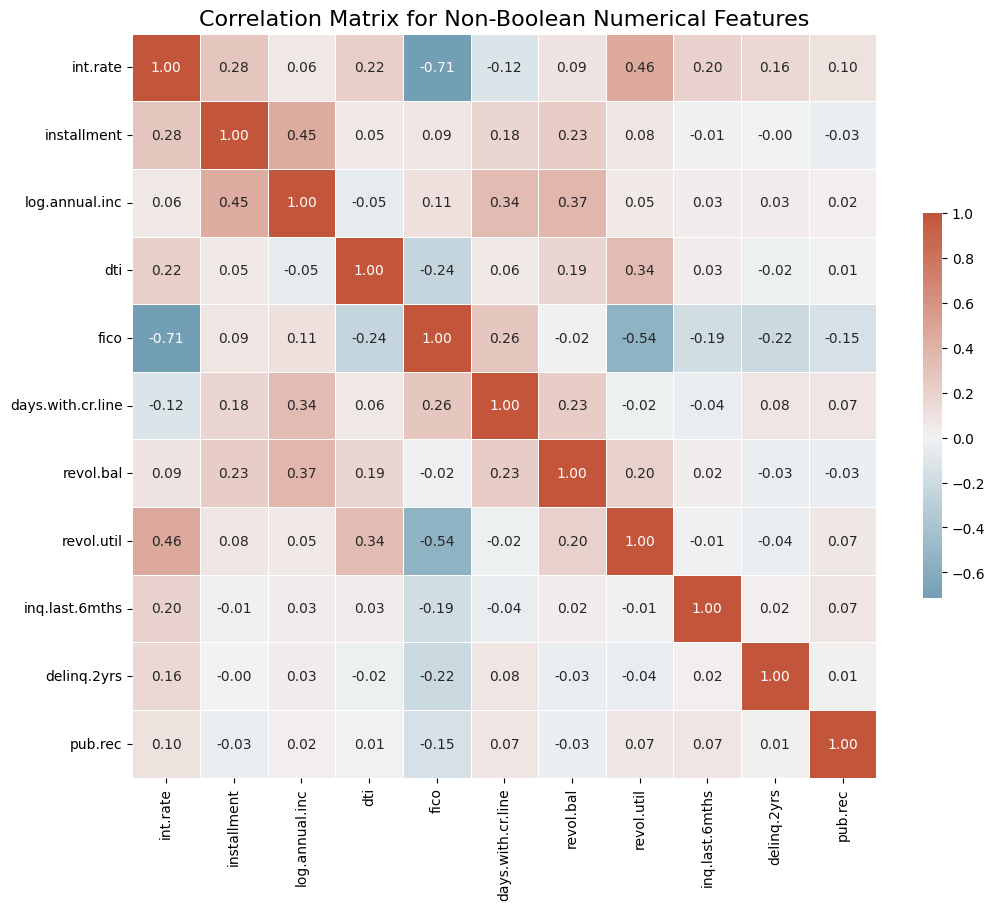

In [6]:
# Calculate the correlation matrix for non-boolean numerical features
corr_matrix = loan_data[non_boolean_numerical_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix for Non-Boolean Numerical Features', fontsize=16)
plt.show()


## Handling Outliers

Outliers can significantly impact the results of data analysis and predictive modeling. To mitigate this, we applied the following strategies to handle outliers in our loan dataset:

### Log Transformation

For numerical features exhibiting significant right skewness, log transformations were applied to reduce skewness and the impact of extreme values. This transformation is beneficial for features with exponential growth or heavy-tailed distributions, common in financial data.

The transformed features are:

- Any feature with skewness greater than 1, e.g., `installment_log`, `revol.bal_log`, etc.

### Capping and Flooring

To limit the influence of extreme outlier values while retaining their presence in the dataset, we applied capping and flooring based on percentile thresholds:

- The lower bound is set at the 1st percentile.
- The upper bound is set at the 99th percentile.

This approach adjusts only the most extreme values, reducing their influence on the analysis without completely discarding potentially informative data.

The capped features are:

- All numerical features, e.g., `installment_capped`, `revol.bal_capped`, etc.

These steps aim to improve the robustness of subsequent data analysis and modeling stages, ensuring that our insights and predictions are not unduly influenced by extreme data points.


In [7]:
# Implementing the suggested outlier handling strategy:

# Apply log transformation to features with heavy right-skewness
# Define a threshold for skewness
skewness_threshold = 1
for feature in non_boolean_numerical_features:
    if loan_data[feature].skew() > skewness_threshold:
        loan_data[f'{feature}_log'] = np.log1p(loan_data[feature])

# Identify and cap/floor the extreme values for numerical features
# Capping/Flooring at the 1st and 99th percentiles
for feature in non_boolean_numerical_features:
    lower_bound = loan_data[feature].quantile(0.01)
    upper_bound = loan_data[feature].quantile(0.99)
    loan_data[f'{feature}_capped'] = np.clip(loan_data[feature], lower_bound, upper_bound)

# Displaying the transformed data frame with additional columns for log-transformed and capped features
loan_data.head()


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,...,installment_capped,log.annual.inc_capped,dti_capped,fico_capped,days.with.cr.line_capped,revol.bal_capped,revol.util_capped,inq.last.6mths_capped,delinq.2yrs_capped,pub.rec_capped
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,...,829.10,11.350407,19.48,737,5639.958333,28854.0,52.1,0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,...,228.22,11.082143,14.29,707,2760.000000,33623.0,76.7,0,0.0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,...,366.86,10.373491,11.63,682,4710.000000,3511.0,25.6,1,0.0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,...,162.34,11.350407,8.10,712,2699.958333,33667.0,73.2,1,0.0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,...,102.92,11.299732,14.97,667,4066.000000,4740.0,39.5,0,1.0,0


## Creative Feature Engineering

Based on our exploratory data analysis (EDA), we have gained valuable insights into the relationships between features and identified opportunities to enhance our dataset through feature engineering. The goal of this step is to create new features or transform existing ones to uncover more predictive power from our data, which could be pivotal for subsequent modeling phases.

We will focus on the following feature engineering strategies:

1. **Interaction Terms**: Create new features that represent the interaction between significant predictors, potentially uncovering combined effects that are not captured when considering the features independently.
2. **Polynomial Features**: For features with a non-linear relationship with the target, we can create polynomial features to model these relationships more accurately.
3. **Grouping and Aggregation**: For categorical variables or variables indicating groups, we can create aggregated statistics (mean, median, etc.) that might reveal insightful trends.
4. **Binning**: Convert continuous data into categorical bins to capture the non-linear relationship with the target and reduce the influence of minor observation errors or unusual values.


In [8]:
from sklearn.preprocessing import PolynomialFeatures

# 1. Interaction Terms - Example: Interaction between 'fico' and 'int.rate'
loan_data['fico_int_rate_interaction'] = loan_data['fico_capped'] * loan_data['int.rate_capped']

# 2. Polynomial Features - Example: Creating a squared term for 'dti'
pf = PolynomialFeatures(degree=2, include_bias=False)
dti_poly = pf.fit_transform(loan_data[['dti_capped']])
loan_data['dti_squared'] = dti_poly[:, 1]

# 3. Grouping and Aggregation - Example: Mean 'fico' score by 'purpose'
fico_mean_by_purpose = loan_data.groupby('purpose')['fico_capped'].mean().rename('mean_fico_by_purpose')
loan_data = loan_data.join(fico_mean_by_purpose, on='purpose')

# 4. Binning - Example: Binning 'fico' scores into categories
loan_data['fico_category'] = pd.cut(loan_data['fico_capped'], bins=[300, 630, 689, 719, 850], labels=['Bad', 'Fair', 'Good', 'Excellent'])


In [9]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,...,days.with.cr.line_capped,revol.bal_capped,revol.util_capped,inq.last.6mths_capped,delinq.2yrs_capped,pub.rec_capped,fico_int_rate_interaction,dti_squared,mean_fico_by_purpose,fico_category
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,...,5639.958333,28854.0,52.1,0,0.0,0,87.6293,379.4704,703.853677,Excellent
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,...,2760.000000,33623.0,76.7,0,0.0,0,75.7197,204.2041,709.618859,Good
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,...,4710.000000,3511.0,25.6,1,0.0,0,92.5474,135.2569,703.853677,Fair
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,...,2699.958333,33667.0,73.2,1,0.0,0,71.7696,65.6100,703.853677,Good
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,...,4066.000000,4740.0,39.5,0,1.0,0,95.1142,224.1009,709.618859,Fair


## Building and Evaluating Predictive Models


## Logistic Regression Model,Random Forest and XGBoost Models

In [10]:
loan_data["not.fully.paid"] = loan_data["not.fully.paid"].astype(int)
from sklearn.preprocessing import LabelEncoder

# Label encode the 'purpose' column
label_encoder = LabelEncoder()
loan_data['purpose'] = label_encoder.fit_transform(loan_data['purpose'])
loan_data['fico_category'] = label_encoder.fit_transform(loan_data['fico_category'])

# Define features (X) and target (y)
X = loan_data.drop(columns=["not.fully.paid"]) 
y = loan_data["not.fully.paid"] 

In [11]:
# Import necessary libraries for preprocessing and balancing
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize models
log_model = LogisticRegression(max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Fit the models
log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predict and evaluate each model
models = {"Logistic Regression": log_model, "Random Forest": rf_model, "XGBoost": xgb_model}
results = {"Model": [], "Accuracy": [], "ROC-AUC Score": [], "Precision (Class 1)": [],
           "Recall (Class 1)": [], "F1-Score (Class 1)": []}

for model_name, model in models.items():
    preds = model.predict(X_test)
    report = classification_report(y_test, preds, output_dict=True)
    accuracy = accuracy_score(y_test, preds)
    roc_auc = roc_auc_score(y_test, preds)

    # Extract metrics for class 1
    precision = report["1"]["precision"]
    recall = report["1"]["recall"]
    f1 = report["1"]["f1-score"]

    # Append metrics to results
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy)
    results["ROC-AUC Score"].append(roc_auc)
    results["Precision (Class 1)"].append(precision)
    results["Recall (Class 1)"].append(recall)
    results["F1-Score (Class 1)"].append(f1)

# Convert results to a DataFrame for display
import pandas as pd
results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,ROC-AUC Score,Precision (Class 1),Recall (Class 1),F1-Score (Class 1)
0,Logistic Regression,0.613114,0.613169,0.607808,0.630923,0.619150
1,Random Forest,0.915165,0.915074,0.940437,0.885910,0.912360
2,XGBoost,0.894034,0.893871,0.939457,0.841646,0.887866


The performances of the Logistic Regression, Random Forest, and XGBoost models are compared on the loan dataset where the target variable differentiates loans paid off (0) and not paid off (1). It can be seen that there are obvious differences in their performance, especially in the high-risk borrower identification ability, which corresponds to Class 1.

Logistic Regression's performance, however, remained very conservative: the model has given an accuracy of 61.31% with a ROC-AUC score of 61.32%. Both figures point out some predictability exists within this model, although its performance is a little weaker for class 1. This can be viewed in precision at 60.78% for Class 1; every time this model predicts a loan that was not completely repaid, it actually predicts right 60% of those times. The recall for Class 1 was 63.09%, indicating that it had identified approximately 63% of defaulted loans, with an F1-score of 61.91%. This performance underlines the balanced but limited effectiveness of the model in capturing the subtlety of the data, whereby complex interrelations between features are difficult to handle. In sharp contrast, Random Forest yields a much stronger performance with an accuracy of 91.52% and a ROC-AUC score of 91.51%.

It obtained a Class 1 high-risk loan identification precision of 94.04%, thus proving to be highly reliable in its predictions. Its recall is 88.59%, indicating a strong ability of the model in detecting the loans which were not repaid in full, while an F1-score of 91.24% reflects a strong balance between precision and recall. That means that Random Forest is quite effective in capturing the complex interactions and nonlinearities of the data, therefore making it robust for this task. The model returned an accuracy of 89.40% and a ROC-AUC score of 89.39%. The model was less precise for Class 1, compared to Random Forest, with a precision of 93.95%, but still managed to recognize high-risk loans quite well, as evidenced by a high recall of 84.16%.

An F1-score of 88.79% indicates a very strong overall performance. While XGBoost was outperformed by Random Forest in both precision and recall, its comparable results bring out its capability to be a competitive alternative. Comparatively, Random Forest is superior in all metrics, especially in the recall for Class 1, making it more effective for identifying loans at risk of default-a critical requirement in loan risk assessment. XGBoost offers slightly lower recall but maintains high precision, which may be preferable in contexts where minimizing false positives is crucial.  Logistic Regression, while straightforward and interpretable, lags significantly behind in predictive power, particularly in identifying high-risk loans, making it less suitable for this dataset.

.

 **Random Forest feature importance**

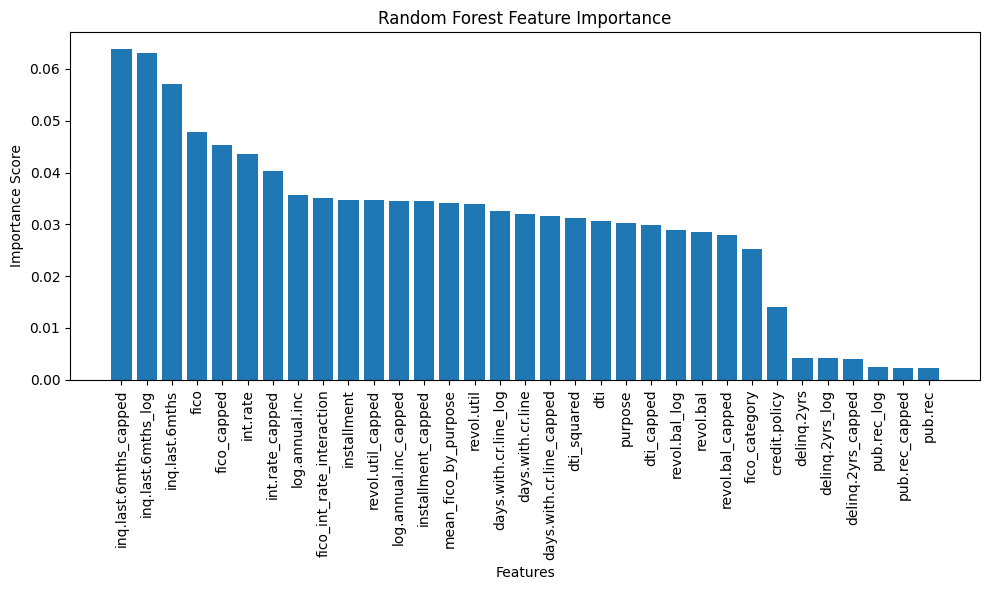

In [12]:
# Feature importance analysis for Random Forest and XGBoost
import matplotlib.pyplot as plt
import numpy as np

# Random Forest feature importance
rf_importances = rf_model.feature_importances_
rf_indices = np.argsort(rf_importances)[::-1]  # Sort in descending order
rf_features = X.columns[rf_indices]

# Plot feature importance for Random Forest
plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importance")
plt.bar(range(len(rf_importances)), rf_importances[rf_indices], align="center")
plt.xticks(range(len(rf_importances)), rf_features, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()




**XGBoost feature importance**

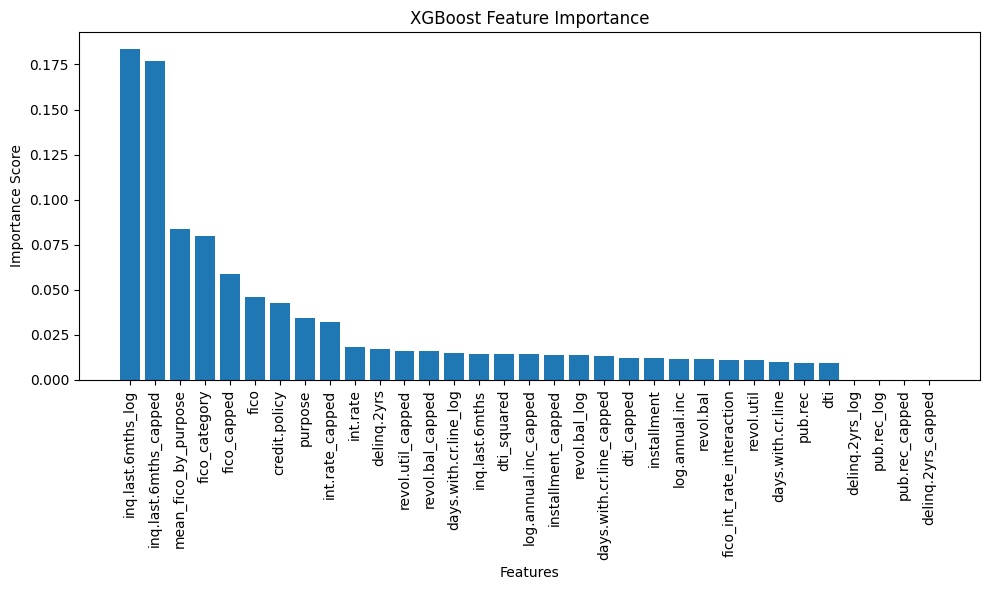

In [13]:
# XGBoost feature importance
xgb_importances = xgb_model.feature_importances_
xgb_indices = np.argsort(xgb_importances)[::-1]  # Sort in descending order
xgb_features = X.columns[xgb_indices]

# Plot feature importance for XGBoost
plt.figure(figsize=(10, 6))
plt.title("XGBoost Feature Importance")
plt.bar(range(len(xgb_importances)), xgb_importances[xgb_indices], align="center")
plt.xticks(range(len(xgb_importances)), xgb_features, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

##  2. Hyperparameter Tuning

In [14]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 2. Hyperparameter tuning for Random Forest using GridSearchCV
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fitting GridSearchCV for Random Forest
rf_grid_search.fit(X_train, y_train)

# Best parameters and model for Random Forest
rf_best_params = rf_grid_search.best_params_
rf_best_model = rf_grid_search.best_estimator_

# 2. Hyperparameter tuning for XGBoost using RandomizedSearchCV
xgb_param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_random_search = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, random_state=42),
    param_distributions=xgb_param_dist,
    scoring='roc_auc',
    cv=3,
    n_iter=50,
    verbose=1,
    n_jobs=-1
)

# Fitting RandomizedSearchCV for XGBoost
xgb_random_search.fit(X_train, y_train)

# Best parameters and model for XGBoost
xgb_best_params = xgb_random_search.best_params_
xgb_best_model = xgb_random_search.best_estimator_

# Output best parameters for both models
rf_best_params, xgb_best_params


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\sulim\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:57:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


({'max_depth': 30,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 300},
 {'subsample': 1.0,
  'n_estimators': 300,
  'max_depth': 7,
  'learning_rate': 0.1,
  'colsample_bytree': 0.8})

## Re-Evaluation

In [15]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Evaluate Random Forest
rf_preds = rf_best_model.predict(X_test)
print("Random Forest - Accuracy:", accuracy_score(y_test, rf_preds))
print("Random Forest - ROC AUC:", roc_auc_score(y_test, rf_preds))
print("Random Forest - Classification Report:\n", classification_report(y_test, rf_preds))

# Evaluate XGBoost
xgb_preds = xgb_best_model.predict(X_test)
print("XGBoost - Accuracy:", accuracy_score(y_test, xgb_preds))
print("XGBoost - ROC AUC:", roc_auc_score(y_test, xgb_preds))
print("XGBoost - Classification Report:\n", classification_report(y_test, xgb_preds))


Random Forest - Accuracy: 0.9173399627097576
Random Forest - ROC AUC: 0.9172541848600307
Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      1614
           1       0.94      0.89      0.91      1604

    accuracy                           0.92      3218
   macro avg       0.92      0.92      0.92      3218
weighted avg       0.92      0.92      0.92      3218

XGBoost - Accuracy: 0.9033561218147917
XGBoost - ROC AUC: 0.9032055085334989
XGBoost - Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1614
           1       0.95      0.85      0.90      1604

    accuracy                           0.90      3218
   macro avg       0.91      0.90      0.90      3218
weighted avg       0.91      0.90      0.90      3218




The performances of the Random Forest and XGBoost models are improved after hyperparameter tuning, hence showing their predictability for the target variable of the status of loan repayment. The results of both models were obtained on the loan dataset with a target variable of loans that are fully repaid-0 and not fully repaid-1.

The Random Forest model has an accuracy of 91.73% and a ROC-AUC score of 91.73%. This means excellent overall performance and that the model has a well-balanced capability of distinguishing between the two classes. In the case of loans not being fully repaid, Class 1, the model reached a precision of 94%, which is highly reliable for identifying high-risk borrowers. Its recall for Class 1 was 89%, meaning that it correctly identified 89% of the loans which were not fully repaid. The F1-score of 91% reflects a strong balance between precision and recall, underlining its capability to manage both false positives and false negatives effectively.

XGBoost, after tuning, achieved an accuracy of 90.30% and an ROC-AUC score of 90.29%. While slightly less accurate than Random Forest, it maintained competitive performance. The precision for Class 1 was 95%, marginally higher than Random Forest, indicating a strong ability to avoid false positives. Its recall, at 85%, was slightly lower, suggesting it identified fewer high-risk loans compared to Random Forest. The F1-score of 90% illustrates that despite a slight trade-off in recall, XGBoost remains a highly effective model, especially in scenarios where precision is prioritized over recall.

Comparing the two models post-tuning, Random Forest holds a slight edge in overall accuracy and recall, making it more effective in detecting loans not fully repaid. This is particularly beneficial in loan risk assessment, where failing to identify default risks can have significant financial consequences. On the other hand, XGBoost excels in precision, making it advantageous in contexts where minimizing false positives is critical, such as avoiding unnecessary interventions for loans predicted as defaults.

The results demonstrate that both Random Forest and XGBoost are highly capable models for this task, with their performance further optimized through hyperparameter tuning. While Random Forest offers a slight overall advantage, the choice between the two models may depend on the specific priorities of the application, such as emphasizing recall for risk identification or precision for resource optimization.

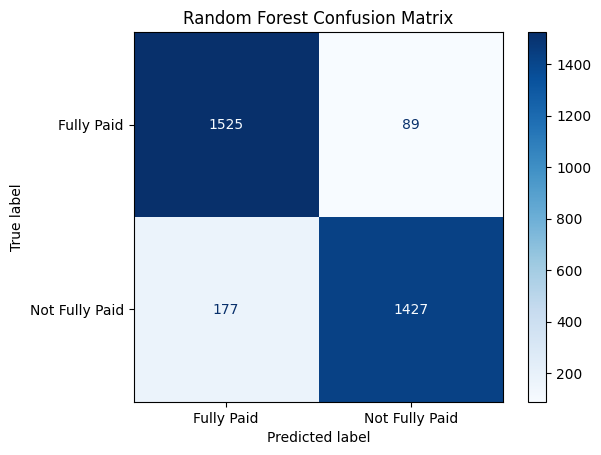

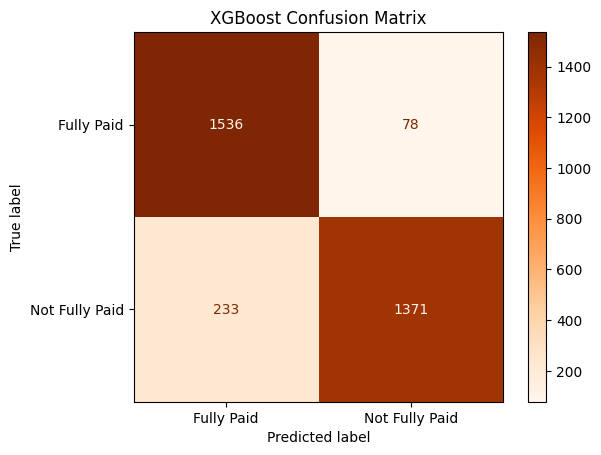

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_preds)
ConfusionMatrixDisplay(rf_cm, display_labels=['Fully Paid', 'Not Fully Paid']).plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

# XGBoost Confusion Matrix
xgb_cm = confusion_matrix(y_test, xgb_preds)
ConfusionMatrixDisplay(xgb_cm, display_labels=['Fully Paid', 'Not Fully Paid']).plot(cmap='Oranges')
plt.title("XGBoost Confusion Matrix")
plt.show()


### Random Forest Feature Importance (Tuned Model)

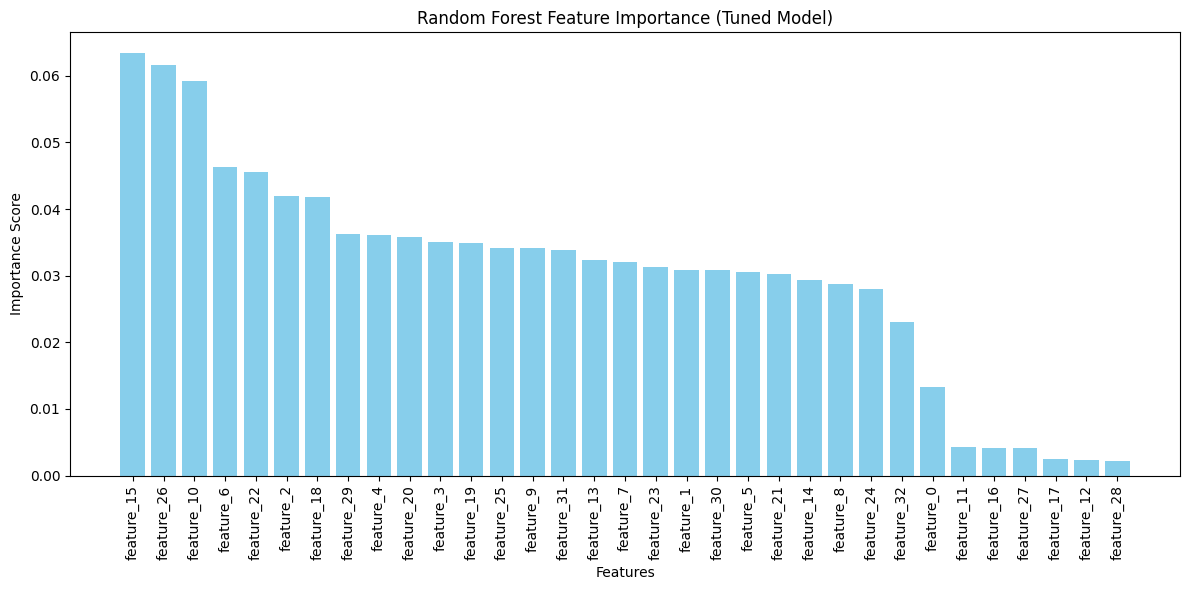

In [17]:
# Extract feature names based on X_train's type
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns
else:
    feature_names = [f'feature_{i}' for i in range(X_train.shape[1])]

# Random Forest Feature Importance
rf_importances = rf_best_model.feature_importances_  # Use the tuned model
rf_indices = np.argsort(rf_importances)[::-1]  # Sort in descending order
rf_features = np.array(feature_names)[rf_indices]  # Use extracted feature names

# Plot feature importance for Random Forest
plt.figure(figsize=(12, 6))
plt.title("Random Forest Feature Importance (Tuned Model)")
plt.bar(range(len(rf_importances)), rf_importances[rf_indices], align="center", color='skyblue')
plt.xticks(range(len(rf_importances)), rf_features, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()



### XGBoost Feature Importance (Tuned Model)

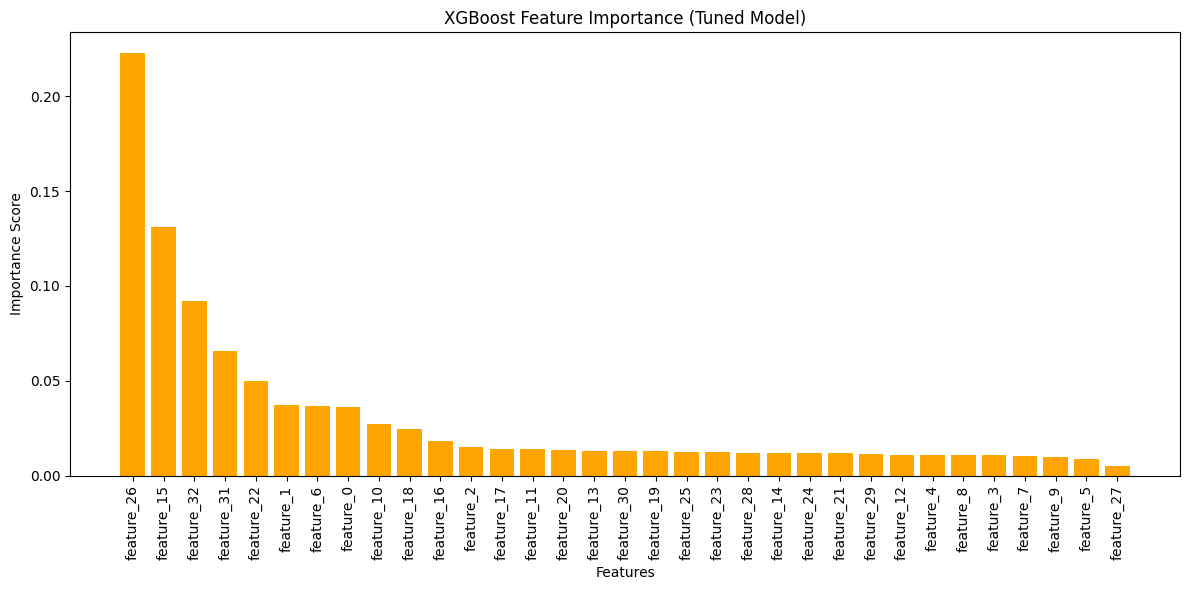

In [18]:
# Extract feature names based on X_train's type
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns
else:
    feature_names = [f'feature_{i}' for i in range(X_train.shape[1])]

# XGBoost Feature Importance
xgb_importances = xgb_best_model.feature_importances_  # Use the tuned model
xgb_indices = np.argsort(xgb_importances)[::-1]  # Sort in descending order
xgb_features = np.array(feature_names)[xgb_indices]  # Use extracted feature names

# Plot feature importance for XGBoost
plt.figure(figsize=(12, 6))
plt.title("XGBoost Feature Importance (Tuned Model)")
plt.bar(range(len(xgb_importances)), xgb_importances[xgb_indices], align="center", color='orange')
plt.xticks(range(len(xgb_importances)), xgb_features, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


### Precision Curves

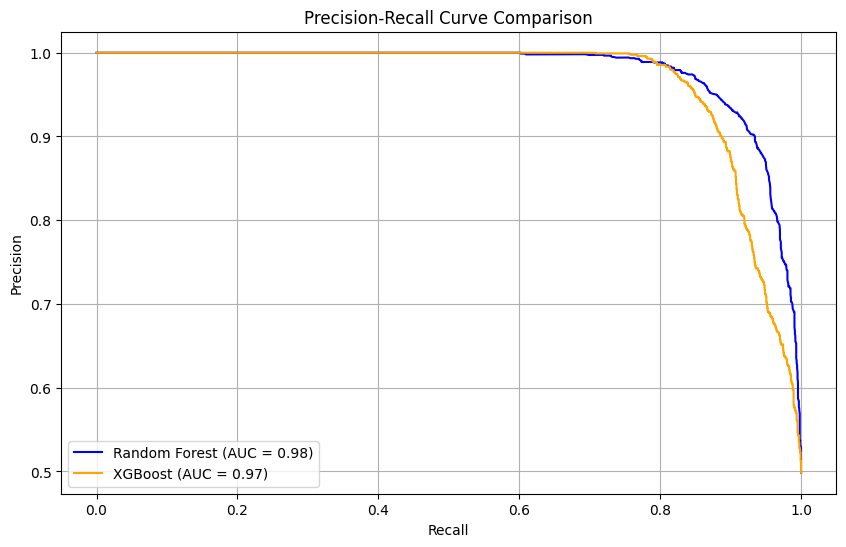

In [24]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Random Forest Precision-Recall Curve
rf_probs = rf_best_model.predict_proba(X_test)[:, 1]  
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)

# XGBoost Precision-Recall Curve
xgb_probs = xgb_best_model.predict_proba(X_test)[:, 1] 
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, xgb_probs)

# Plotting Precision-Recall curves
plt.figure(figsize=(10, 6))

# Random Forest Precision-Recall Curve
plt.plot(rf_recall, rf_precision, label=f"Random Forest (AUC = {auc(rf_recall, rf_precision):.2f})", color='blue')

# XGBoost Precision-Recall Curve
plt.plot(xgb_recall, xgb_precision, label=f"XGBoost (AUC = {auc(xgb_recall, xgb_precision):.2f})", color='orange')

plt.title("Precision-Recall Curve Comparison")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.show()


### ROC Curve

Random Forests ROC Curve

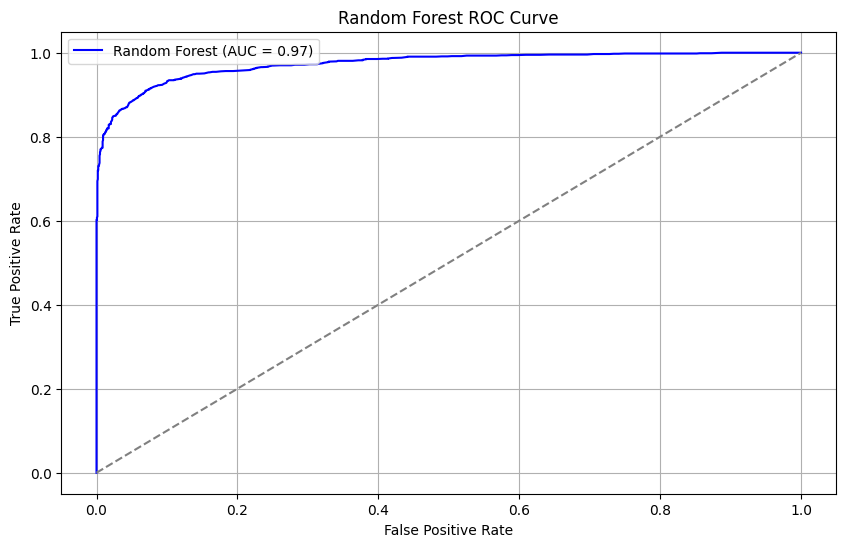

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Random Forest ROC Curve
rf_probs = rf_best_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Random Forest ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


XGBoost ROC Curve

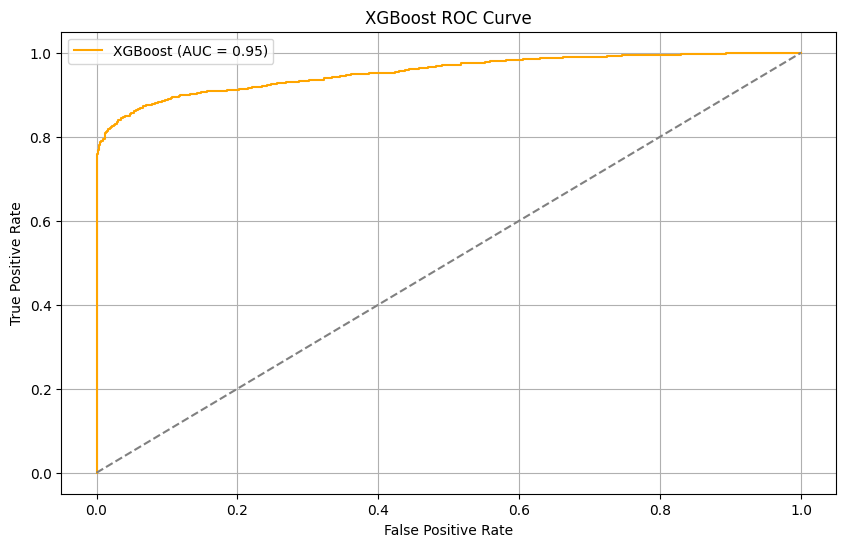

In [21]:
# XGBoost ROC Curve
xgb_probs = xgb_best_model.predict_proba(X_test)[:, 1]
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
xgb_auc = auc(xgb_fpr, xgb_tpr)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(xgb_fpr, xgb_tpr, label=f"XGBoost (AUC = {xgb_auc:.2f})", color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("XGBoost ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


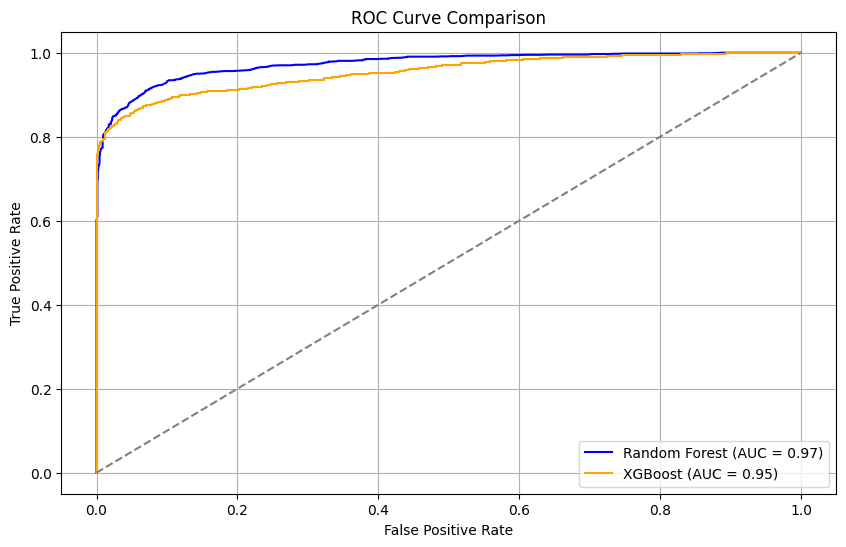

In [22]:
from sklearn.metrics import roc_curve, auc

# Random Forest ROC Curve
rf_probs = rf_best_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

# XGBoost ROC Curve
xgb_probs = xgb_best_model.predict_proba(X_test)[:, 1]
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
xgb_auc = auc(xgb_fpr, xgb_tpr)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})", color='blue')
plt.plot(xgb_fpr, xgb_tpr, label=f"XGBoost (AUC = {xgb_auc:.2f})", color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()
